# Fare Prediction for Uber.
### DESCRIPTION

Design an algorithm that will tell the fare to be charged for a passenger.

### Problem Statement Scenario:
A fare calculator helps a customer in identifying the fare valid for the trip. They are often used by passengers who are new to a city or tourists to get an estimate of the travel costs.
You are provided with a dataset with features like fare amount, pickup and drop location, passenger count, and so on.

### Following actions should be performed:

- Understand the type of data.
- Identify the output variable.
- Identify the factors which affect the output variable.
- Check if there are any biases in your dataset.
- Count the null values existing in columns.
- Remove the null value rows in the target variable.
- Perform train test split.
- Predict the accuracy using regression models.
- Check and compare the accuracy of the different models.

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the data frame
df_train = pd.read_csv('train.csv')

In [3]:
# Read the dataframe
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
df_train.shape

(489639, 8)

In [5]:
df_train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489639 entries, 0 to 489638
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                489639 non-null  object 
 1   fare_amount        489639 non-null  float64
 2   pickup_datetime    489639 non-null  object 
 3   pickup_longitude   489639 non-null  float64
 4   pickup_latitude    489639 non-null  float64
 5   dropoff_longitude  489633 non-null  float64
 6   dropoff_latitude   489633 non-null  float64
 7   passenger_count    489638 non-null  float64
dtypes: float64(6), object(2)
memory usage: 29.9+ MB


In [7]:
df_train.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    6
dropoff_latitude     6
passenger_count      1
dtype: int64

In [8]:
# Convert pickup_datetime into date and time object
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['pickup_datetime'] = df_train['pickup_datetime'].dt.tz_convert(None)

In [9]:
df_train.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [10]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


#we know taxi fare matter on many different factors such as
1. Travelled distance
2. Time of the day
3. Number of passengers
4. Special place
5. availability of taxis

In [11]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,489639.000000,489639.000000,489639.000000,489633.000000,489633.000000,489638.000000
mean,11.356703,-72.521887,39.920952,-72.522489,39.916352,1.682927
std,9.917992,11.880324,8.108405,11.825517,7.416077,1.306892
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992053,40.734922,-73.991386,40.734065,1.000000
50%,8.500000,-73.981787,40.752680,-73.980130,40.753153,1.000000
75%,12.500000,-73.967121,40.767079,-73.963582,40.768140,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


#here it is seen that minimum passenger count is 0 which is not correct

In [12]:
# drop na/null values
df_train.dropna(inplace=True)

In [13]:
df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

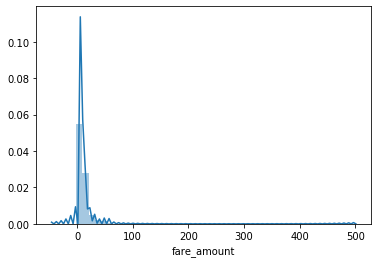

In [14]:
# Plot the fare distribution
sns.distplot(df_train['fare_amount'])
plt.show()

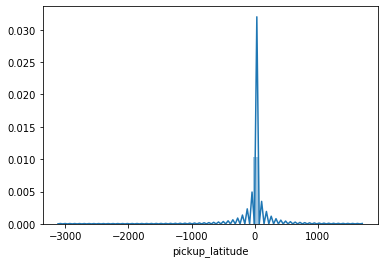

In [15]:
sns.distplot(df_train['pickup_latitude'])
plt.show()

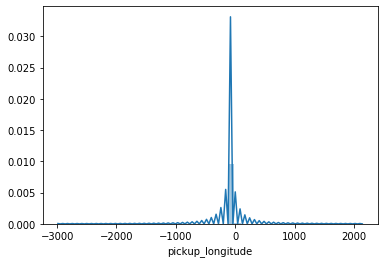

In [16]:
sns.distplot(df_train['pickup_longitude'])
plt.show()

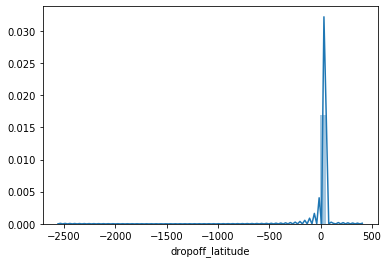

In [17]:
sns.distplot(df_train.dropoff_latitude)
plt.show()

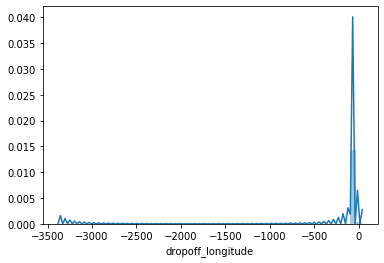

In [18]:
sns.distplot(df_train.dropoff_longitude)
plt.show()

In [19]:
# Let's load test dataset
df_test = pd.read_csv('test.csv')

In [20]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [21]:
df_test.shape

(9914, 7)

In [22]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [23]:
print("drop_off latitude min value",df_test["dropoff_latitude"].min())
print("drop_off latitude max value",df_test["dropoff_latitude"].max())
print("drop_off longitude min value", df_test["dropoff_longitude"].min())
print("drop_off longitude max value",df_test["dropoff_longitude"].max())
print("pickup latitude min value",df_test["pickup_latitude"].min())
print("pickup latitude max value",df_test["pickup_latitude"].max())
print("pickup longitude min value",df_test["pickup_longitude"].min())
print("pickup longitude max value",df_test["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


In [24]:
#we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that even noisy data is remove and we have only the values which belongs to new york

In [25]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [26]:
#lets drop all the values which are not coming in above boundary, as those are noisy data
temp_df=df_train[(df_train["dropoff_latitude"]<min_latitude) | (df_train["pickup_latitude"]<min_latitude) | (df_train["dropoff_longitude"]<min_longitude) | (df_train["pickup_longitude"]<min_longitude) | (df_train["dropoff_latitude"]>max_latitude) | (df_train["pickup_latitude"]>max_latitude) | (df_train["dropoff_longitude"]>max_longitude) | (df_train["pickup_longitude"]>max_longitude) ]
print("before droping",df_train.shape)
df_train.drop(temp_df.index,inplace=True)
print("after droping",df_train.shape)

before droping (489633, 8)
after droping (479240, 8)


In [27]:
#lets remove all those rows where fare amount is negative
print("before dropping", df_train.shape)
df_train = df_train[df_train['fare_amount'] > 0]
print("after dropping", df_train.shape)

before dropping (479240, 8)
after dropping (479209, 8)


#On different day and time there would be different price like during evening price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [28]:
import calendar

In [29]:
df_train['day'] = df_train['pickup_datetime'].apply(lambda x : x.day)
df_train['hour'] = df_train['pickup_datetime'].apply(lambda x : x.hour)
df_train['weekday'] = df_train['pickup_datetime'].apply(lambda x : calendar.day_name[x.weekday()])
df_train['month'] = df_train['pickup_datetime'].apply(lambda x : x.month)
df_train['year'] = df_train['pickup_datetime'].apply(lambda x : x.year)

In [30]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9,7,Tuesday,3,2010


In [31]:
df_train.weekday = df_train.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479209 entries, 0 to 489637
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                479209 non-null  object        
 1   fare_amount        479209 non-null  float64       
 2   pickup_datetime    479209 non-null  datetime64[ns]
 3   pickup_longitude   479209 non-null  float64       
 4   pickup_latitude    479209 non-null  float64       
 5   dropoff_longitude  479209 non-null  float64       
 6   dropoff_latitude   479209 non-null  float64       
 7   passenger_count    479209 non-null  float64       
 8   day                479209 non-null  int64         
 9   hour               479209 non-null  int64         
 10  weekday            479209 non-null  int64         
 11  month              479209 non-null  int64         
 12  year               479209 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(5), 

In [33]:
# we will keep only those rows where number of passangers are less than or equal to 8
df_train = df_train[df_train['passenger_count'] <=8]

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479209 entries, 0 to 489637
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                479209 non-null  object        
 1   fare_amount        479209 non-null  float64       
 2   pickup_datetime    479209 non-null  datetime64[ns]
 3   pickup_longitude   479209 non-null  float64       
 4   pickup_latitude    479209 non-null  float64       
 5   dropoff_longitude  479209 non-null  float64       
 6   dropoff_latitude   479209 non-null  float64       
 7   passenger_count    479209 non-null  float64       
 8   day                479209 non-null  int64         
 9   hour               479209 non-null  int64         
 10  weekday            479209 non-null  int64         
 11  month              479209 non-null  int64         
 12  year               479209 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(5), 

In [35]:
# drop key and pickup_datetime, as we have already processed them
df_train.drop(['key', 'pickup_datetime'], axis =1, inplace=True)

In [36]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,9,7,2,3,2010


In [37]:
# let's extract feature and target dataset
X = df_train.drop(['fare_amount'], axis = 1)
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,-73.844311,40.721319,-73.841610,40.712278,1.0,15,17,1,6,2009
1,-74.016048,40.711303,-73.979268,40.782004,1.0,5,16,2,1,2010
2,-73.982738,40.761270,-73.991242,40.750562,2.0,18,0,4,8,2011
3,-73.987130,40.733143,-73.991567,40.758092,1.0,21,4,6,4,2012
4,-73.968095,40.768008,-73.956655,40.783762,1.0,9,7,2,3,2010


In [38]:
Y = df_train['fare_amount']

In [39]:
# divide the test data into training and testing dataset
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = True)

In [41]:
x_train.shape

(335446, 10)

In [42]:
#Lets run the model.
#As we have to build regression model, lets start with linear regression model

In [43]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [44]:
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
predict = linReg.predict(x_test)

In [46]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 8.520206718077066


In [49]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [50]:
rfrmodel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [51]:
fpredict = rfrmodel.predict(x_test)

In [52]:
rfrmodel_rmse=np.sqrt(mean_squared_error(fpredict, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  6.008165486875786


In [53]:
#RandomForest Regressor is giving good value, so we can use it as final model